# Random Forest Model

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb

In [42]:
df = pd.read_csv("selected_heartdata.csv")

In [43]:
df.head()

,HeartDisease,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,0,3,0,0,5,3.0
1,0,3,1,0,0,0.0
2,0,2,0,0,1,0.0
3,0,1,0,0,0,0.0
4,0,2,0,1,3,0.0


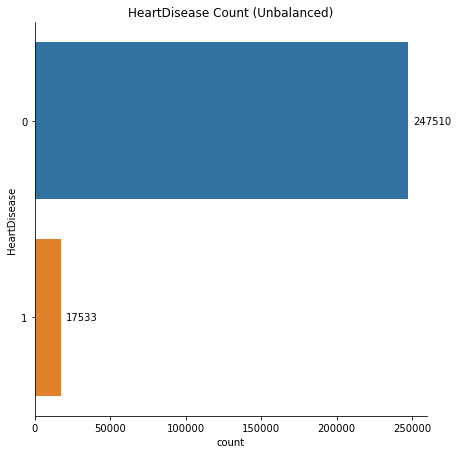

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to add count labels to the bars
def add_count_labels(ax, data):
    for ax_sub in ax.axes.flat:
        for p, count in zip(ax_sub.patches, data):
            ax_sub.annotate(f'{count}', (p.get_width(), p.get_y() + p.get_height() / 2),
                            ha='left', va='center', xytext=(5, 0), textcoords='offset points')


g = sns.catplot(y="HeartDisease", data=df, kind="count", height=6)
plt.title("HeartDisease Count (Unbalanced)")
add_count_labels(g, df["HeartDisease"].value_counts())

plt.show()


In [7]:
#Define dependent variables
Y = df['HeartDisease'].values

#Define independent variables
X = df.drop(labels=['HeartDisease'],axis=1)

In [8]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [9]:
from sklearn.ensemble import RandomForestClassifier #use classifier cuz its binary Y

model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

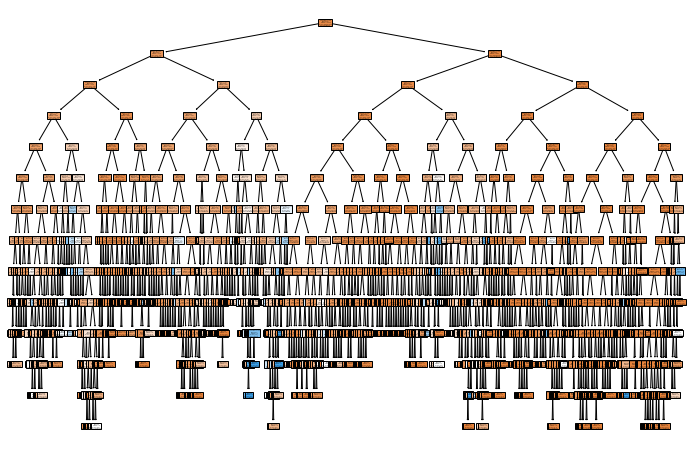

In [32]:
from sklearn import tree

tree_in_forest = model.estimators_[0]
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_in_forest, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [10]:
prediction_test = model.predict(X_test)

In [12]:
#Feature importance (higher number, higher importance)
feature_list = list(X.columns)
feature_imp=pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

AgeCategory       0.466504
GenHealth         0.247917
Stroke            0.154643
DiffWalking       0.077169
PhysicalHealth    0.053767
dtype: float64


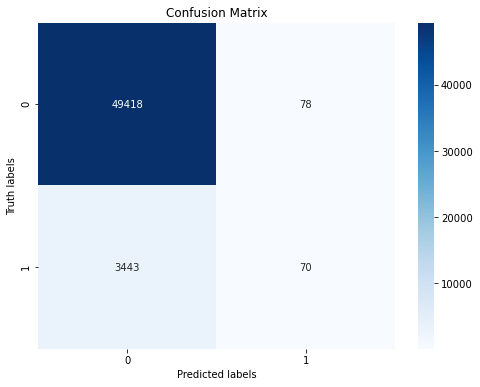

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, prediction_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('Truth labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
TP = conf_matrix[1, 1]  # True Positive
FP = conf_matrix[0, 1]  # False Positive
TN = conf_matrix[0, 0]  # True Negative
FN = conf_matrix[1, 0]  # False Negative
True_Positive_Rate = TP / (TP + FN)
False_Positive_Rate = FP / (FP + TN)
False_Negative_Rate = FN / (FN + TP)
True_Negative_Rate= TN/ (TN+FP)

print("True Postive Rate for Train Data: ",True_Positive_Rate )
print("False Postive Rate for Train Data: ",False_Positive_Rate)
print("False Negative Rate for Train Data: ",False_Negative_Rate)
print("True Negative Rate for Train Data: ",True_Negative_Rate)
print()

accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("Accuracy =", accuracy)


True Postive Rate for Train Data:  0.019925989183034443
False Postive Rate for Train Data:  0.0015758849199935347
False Negative Rate for Train Data:  0.9800740108169655
True Negative Rate for Train Data:  0.9984241150800065

Accuracy = 0.9335773170593673


# Balanced

In [59]:
df2 = pd.read_csv("balanced_heartdata.csv")
df.head()

,HeartDisease,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,0,3,0,0,5,3.0
1,0,3,1,0,0,0.0
2,0,2,0,0,1,0.0
3,0,1,0,0,0,0.0
4,0,2,0,1,3,0.0


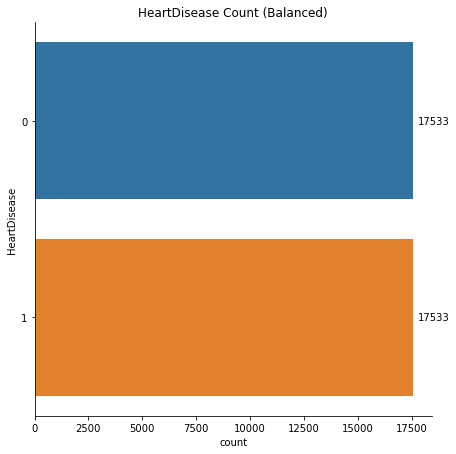

In [60]:
g2 = sns.catplot(y="HeartDisease", data=df2, kind="count", height=6)
plt.title("HeartDisease Count (Balanced)")
add_count_labels(g2, df2["HeartDisease"].value_counts())

plt.show()

In [61]:
#Define dependent variables
Y2 = df2['HeartDisease'].values

#Define independent variables
X2 = df2.drop(labels=['HeartDisease'],axis=1)

#Splitting data
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.2,random_state=20)

model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(X2_train,Y2_train)

RandomForestClassifier(n_estimators=10, random_state=30)

In [62]:
#Feature importance (higher number, higher importance)
feature_list = list(X2.columns)
feature_imp=pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

AgeCategory       0.576007
GenHealth         0.261762
Stroke            0.072984
DiffWalking       0.054930
PhysicalHealth    0.034318
dtype: float64


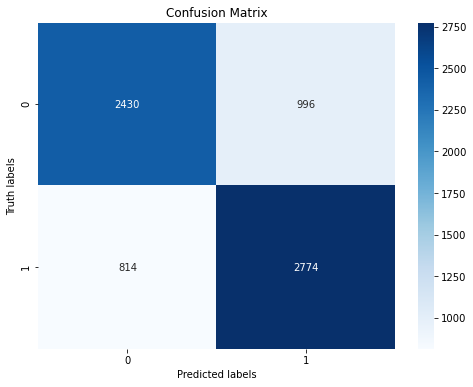

In [65]:
conf_matrix2 = confusion_matrix(Y2_test, prediction_test2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('Truth labels')
plt.title('Confusion Matrix')
plt.show()

In [67]:
TP2 = conf_matrix2[1, 1]  # True Positive
FP2 = conf_matrix2[0, 1]  # False Positive
TN2 = conf_matrix2[0, 0]  # True Negative
FN2 = conf_matrix2[1, 0]  # False Negative
True_Positive_Rate2 = TP2 / (TP2 + FN2)
False_Positive_Rate2 = FP2 / (FP2 + TN2)
False_Negative_Rate2 = FN2 / (FN2 + TP2)
True_Negative_Rate2= TN2/ (TN2+FP2)

print("True Postive Rate for Train Data: ",True_Positive_Rate2 )
print("False Postive Rate for Train Data: ",False_Positive_Rate2)
print("False Negative Rate for Train Data: ",False_Negative_Rate2)
print("True Negative Rate for Train Data: ",True_Negative_Rate2)
print()

accuracy = (conf_matrix2[0, 0] + conf_matrix2[1, 1]) / np.sum(conf_matrix2)
print("Accuracy =", accuracy)



True Postive Rate for Train Data:  0.7731326644370122
False Postive Rate for Train Data:  0.29071803852889666
False Negative Rate for Train Data:  0.22686733556298774
True Negative Rate for Train Data:  0.7092819614711033

Accuracy = 0.7419446820644425
